# Data Process

Find the correlation and encoding the all non numeric data

In [2]:
# connect to google drive where the data file located
from google.colab import drive
drive.mount('/content/drive')
#cd /content/drive/MyDrive/Data Climate

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data Climate

/content/drive/MyDrive/Data Climate


In [4]:
import pandas as pd

# read data
df= pd.read_csv("cleaned_df.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month

<ipython-input-4-d0778df63b6f>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("cleaned_df.csv")


In [5]:
# remove index/ID columns
df=df.drop({'OBJECTID','FOD_ID', 'FPA_ID','NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT','DISCOVERY_DOY','STATE','OWNER_CODE', 'OWNER_DESCR','DATE'}, axis=1)
df.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,MONTH
0,FED,FS-FIRESTAT,Plumas National Forest,2005,2453403.5,9.0,Miscellaneous,0.1,A,40.036944,-121.005833,2
1,FED,FS-FIRESTAT,Shasta-Trinity National Forest,2005,2453437.5,5.0,Debris Burning,0.8,B,40.968056,-122.433889,3
2,FED,FS-FIRESTAT,Shasta-Trinity National Forest,2005,2453444.5,5.0,Debris Burning,1.0,B,41.233611,-122.283333,3
3,FED,FS-FIRESTAT,Deschutes National Forest,2005,2453406.5,4.0,Campfire,0.1,A,43.995556,-121.414167,2
4,FED,FS-FIRESTAT,Deschutes National Forest,2005,2453434.5,4.0,Campfire,0.1,A,44.043333,-121.386111,3


In [ ]:
import plotly.express as px
fire_counts = df.groupby('STAT_CAUSE_DESCR').size().reset_index(name='n_fires')
fire_counts['n_fires'] = fire_counts['n_fires'] / 1000  # Convert to thousands

# Sort the data by number of fires
fire_counts.sort_values('n_fires', ascending=False, inplace=True)

fig = px.bar(fire_counts, x='n_fires', y='STAT_CAUSE_DESCR', orientation='h',
             title='US Wildfires by Cause 2005 to 2015',
             labels={'n_fires': 'Number of fires (thousands)', 'STAT_CAUSE_DESCR': ''},
             template='plotly_white')

# Set the bar color
fig.update_traces(marker_color='orange')

# Update layout for a cleaner look
fig.update_layout(
    xaxis_title='Number of fires (thousands)',
    yaxis_title='',
    yaxis={'categoryorder':'total ascending'},  # Ensures categories are sorted by value
    title_font_size=20
)

# Show the plot
fig.show()

In [ ]:
og_df=df

In [ ]:
df=og_df

In [6]:
df.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,MONTH
0,FED,FS-FIRESTAT,Plumas National Forest,2005,2453403.5,9.0,Miscellaneous,0.1,A,40.036944,-121.005833,2
1,FED,FS-FIRESTAT,Shasta-Trinity National Forest,2005,2453437.5,5.0,Debris Burning,0.8,B,40.968056,-122.433889,3
2,FED,FS-FIRESTAT,Shasta-Trinity National Forest,2005,2453444.5,5.0,Debris Burning,1.0,B,41.233611,-122.283333,3
3,FED,FS-FIRESTAT,Deschutes National Forest,2005,2453406.5,4.0,Campfire,0.1,A,43.995556,-121.414167,2
4,FED,FS-FIRESTAT,Deschutes National Forest,2005,2453434.5,4.0,Campfire,0.1,A,44.043333,-121.386111,3


In [7]:
from sklearn.preprocessing import LabelEncoder

# list of columns to be encoded
columns_to_encode = ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT_NAME', 'STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']

label_mappings = {}

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

label_mappings
df.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,MONTH
0,0,2,2589,2005,2453403.5,9.0,7,0.1,0,40.036944,-121.005833,2
1,0,2,2973,2005,2453437.5,5.0,3,0.8,1,40.968056,-122.433889,3
2,0,2,2973,2005,2453444.5,5.0,3,1.0,1,41.233611,-122.283333,3
3,0,2,897,2005,2453406.5,4.0,1,0.1,0,43.995556,-121.414167,2
4,0,2,897,2005,2453434.5,4.0,1,0.1,0,44.043333,-121.386111,3


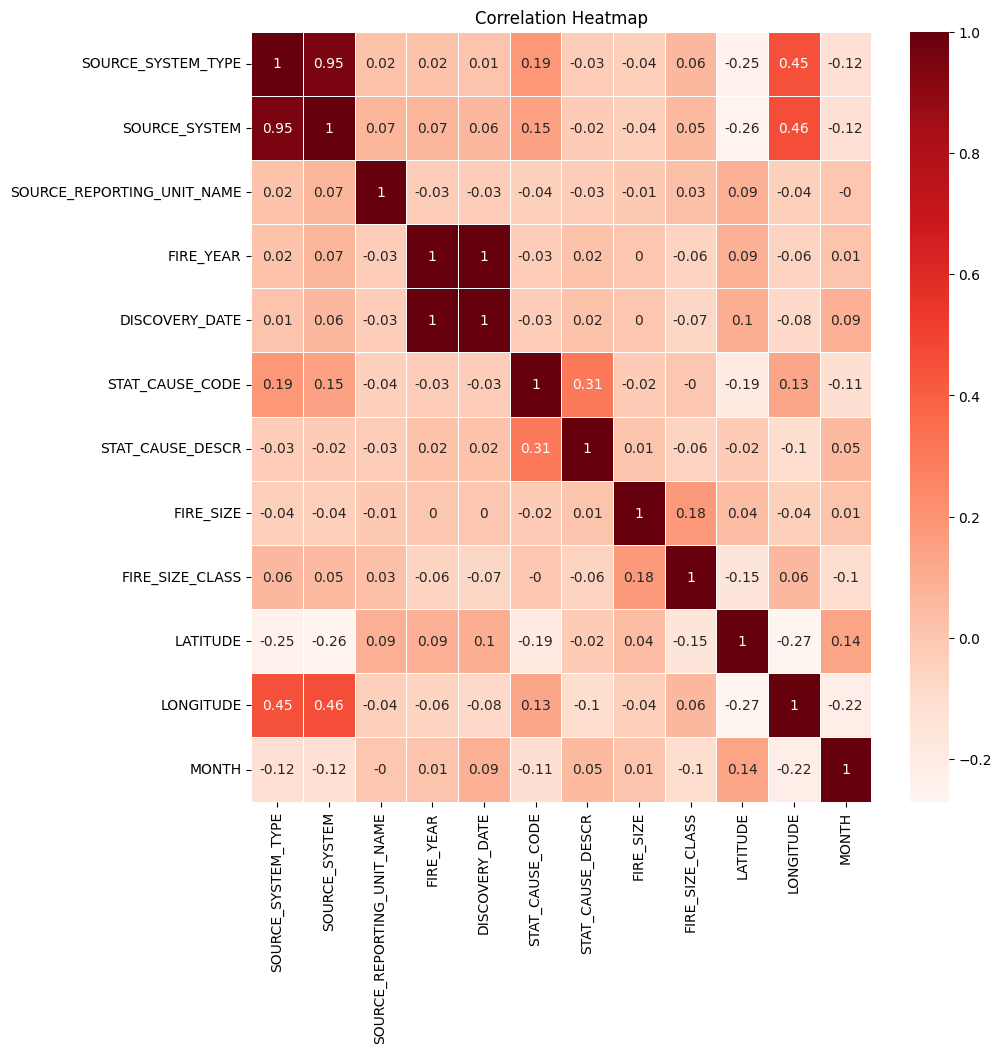

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap to analyze the correlation between variables
correlation_matrix = df.corr().round(2)
#custom_palette = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Models

Apple three different models on the dataset to predict the categories on the cause of the wildfire

## GradientBoosting

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
import random
import pickle
random.seed(100)


In [9]:
X = df.drop({'STAT_CAUSE_DESCR'}, axis=1)
y = df['STAT_CAUSE_DESCR']
# Split the dataset into a training set (80%) and a test set (20%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# GradientBoosting
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

## RandomForest

In [11]:
# RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

## AdaBoost

In [12]:
# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

AdaBoostClassifier()

# Save and reload the model

In [13]:
pkl_filename = [("GradientBoostPickle.pkl",gb_model),
                ("RandomForestPickle.pkl", rf_model),
                ("AdaBoostPickle.pkl",ada_model)]
for i in range(3):
    print(f"{pkl_filename[i][0]}","saved.")
    with open('./saved_stacked_models/'+pkl_filename[i][0], 'wb') as file:
        pickle.dump(pkl_filename[i][1], file)

GradientBoostPickle.pkl saved.
RandomForestPickle.pkl saved.
AdaBoostPickle.pkl saved.


In [15]:
with open('./saved_stacked_models/AdaBoostPickle.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = pickle_model.predict(x_test)

Test score: 68.20 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                       Feature  Importance
5              STAT_CAUSE_CODE    0.790627
9                    LONGITUDE    0.051464
8                     LATITUDE    0.036628
2   SOURCE_REPORTING_UNIT_NAME    0.027638
1                SOURCE_SYSTEM    0.026694
0           SOURCE_SYSTEM_TYPE    0.018253
10                       MONTH    0.016621
4               DISCOVERY_DATE    0.014145
6                    FIRE_SIZE    0.008644
3                    FIRE_YEAR    0.006444
7              FIRE_SIZE_CLASS    0.002842
